## Task 36 - UsArrests.csv

### Stage 1 - Data Cleasning

Note - Data Collection already completed as working from open source data.

In [1]:
# Importing the required packages here

# Importing Libraries 
import numpy as np
import pandas as pd
import missingno
from scipy import stats

# Import Preprocessing
from mlxtend.preprocessing import minmax_scaling

# For visualisation
import matplotlib.pyplot as plt
import seaborn as sns

Note - Data description, this data set contains statistics in arrests per 100,00 residents for assult, murder, and rape in each of the 50 US States in 1973. Also given is the percentage of the population living in urban areas.

Murder - Murder Arrests per 100,000 residents,

Assault - Assaults arrests per 100,000 residents,

Rape - Rapes arrests per 100,000 residents,

UrbanPOp - Percentage urban population.

In [2]:
# Load UsArrests.csv and create datafram
usArrests_df = pd.read_csv("UsArrests.csv")

# Review initial columsn and rows
usArrests_df.head()


,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
# Look at dfs information.
usArrests_df.info()

# 50 entries
# 5 Columns.

# At present, no columns are to be dropped. 
# Feature titles look appropriate.
# DTypes look appropriate.
# Categorical data for 'City'.
# Continuous data for other feature classes.
# Apparently no missing or nan values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [4]:
# Rename column 'City' to 'State'.
usArrests_df.rename(columns = {'City' : 'State'}, inplace= True)
#usArrests_df

<AxesSubplot: >

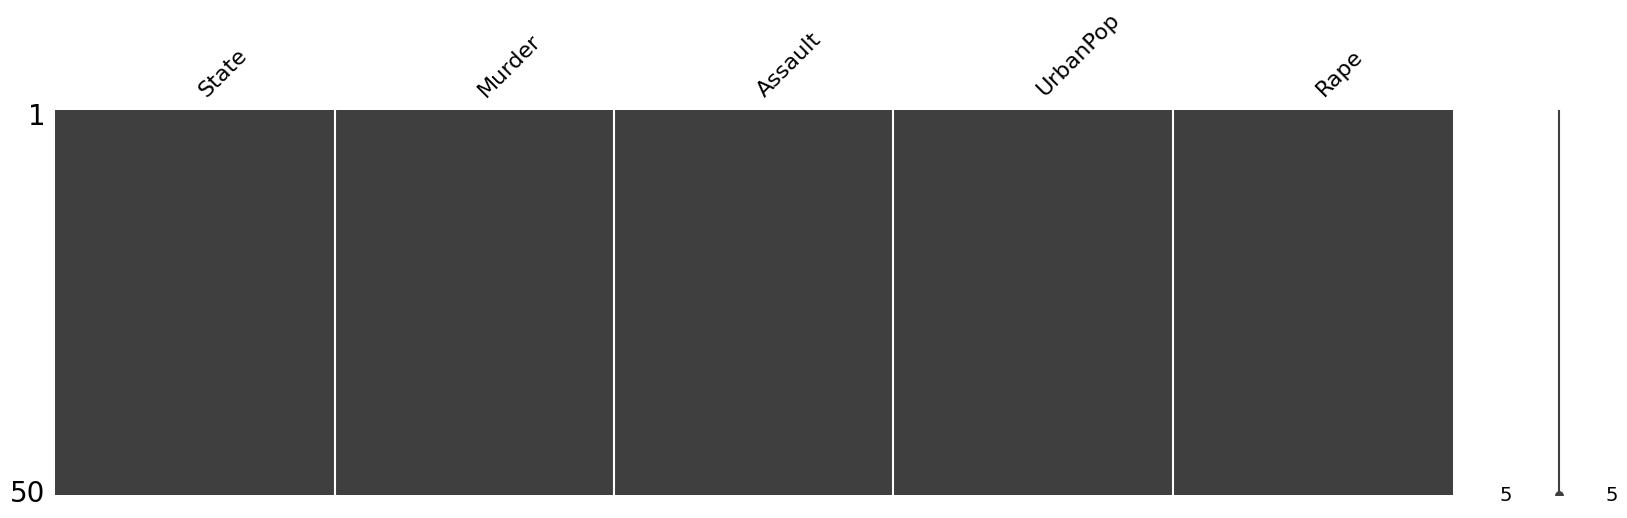

In [5]:
## Initial Data Cleansing 

# Plot graphic of missing values
missingno.matrix(usArrests_df, figsize = (20,5))

# Data appears good, no absense of values and pressence of complete columns.

In [6]:
# Look at dfs statistical information
usArrests_df.describe()

# We have a larger variance between murder and assault. 
# Normalising should allow better visualisation and interpretability.
# Data appear to fall into expected ranges for Murder, Rape, Assault.
# Std 

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


#### Data Transformation

In [7]:
cols = usArrests_df.columns
print(cols)

Index(['State', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')


In [8]:
# Make copy of df, replace columns for scaled versions
usArrests_copy_df = usArrests_df.copy()

# Get df column names we wish to scale.
column_names = usArrests_copy_df.columns[1:]

def scaled_replace(new_df, column_names):
    """
    Function to take selected columns and scale data between 0 and 1.
    """
    for n in column_names:
        # Scale data in column 'n'
        column = new_df[n].values
        scaled_column = minmax_scaling(column, columns = [0])
   
        # Add scaled data as new columns
        new_col_name = f"{n}_scaled"
        new_df[new_col_name] = scaled_column
        
        # Drop original columns
        new_df.drop(n,axis = 1, inplace = True)
    

    return new_df

# Run function to convert to scaled df.
usArrests_copy_df = scaled_replace(usArrests_copy_df, column_names)

# Check
usArrests_copy_df.head()                                

,State,Murder_scaled,Assault_scaled,UrbanPop_scaled,Rape_scaled
0,Alabama,0.746988,0.654110,0.440678,0.359173
1,Alaska,0.554217,0.746575,0.271186,0.961240
2,Arizona,0.439759,0.852740,0.813559,0.612403
3,Arkansas,0.481928,0.496575,0.305085,0.315245
4,California,0.493976,0.791096,1.000000,0.860465


#### Additional Data Gathering

I want to look at larger geographical locations, so I will form lists of geographical regions contianing multiple states in which to groupby.

In [9]:
# Dictionary of USA state codes to full name of state
state_codes = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming'
}

In [10]:
# Swap dictionary key:values pairs
state_codes = {v: k for k, v in state_codes.items()}
#print(state_codes)

In [11]:
# Geographical Regions.
north_east = ["PA","NJ","NY","CT","RI","MA","NH","VT","ME","HI",]
north_central = ["NDf","MN","WI","MI","SD","NE","KS","IA","MO","IL","IN","OH",]
south = ["OK","TX","AR","LA","KY","TN","MS","AL","WV","VA","NC","SC","GA","FL","DE","MD"]
west = ["WA","MT","OR","ID","WY","CA","NV","UT","AZ","CO","NM","AK"]

# Dictionary to store the region as keys and lists of state as values.
cardinal_regions = {"North East": north_east,
                    "North Central": north_central,
                    "South": south,
                    "West": west}

In [12]:
# New column in the dataframe to store the regions
usArrests_copy_df["Cardinal_Region"] = None

In [13]:
def region_match(df, region_dict, column_name):
    """
    Update Dataframe 'Region' columns name using custom region dictionary.
    """
    # For each record by index number and row column data,
    for index, row in df.iterrows():
        # Extract state name from row data,
        state_name = row["State"]
        # Get state-code value from given State_name as key,
        state_code = state_codes.get(state_name)
        # If key found...
        if state_code:
            # loop for each region containing state-codes,
            for region, states in region_dict.items():
                # If that state_code is states list,
                if state_code in states:
                    # Update index rows region column with found region. 
                    df.at[index, column_name] = region
                    break
    
    return df

In [14]:
# Run region_match function on original dataset.
usArrests_df = region_match(usArrests_df,
                            cardinal_regions,
                            "Cardinal_Region")

# Run region_match function on scaled dataset.
usArrests_copy_df = region_match(usArrests_copy_df,
                                 cardinal_regions,
                                 "Cardinal_Region")

In [15]:
# Check revised df.
usArrests_copy_df.head()

# df can now be grouped by region. 

,State,Murder_scaled,Assault_scaled,UrbanPop_scaled,Rape_scaled,Cardinal_Region
0,Alabama,0.746988,0.654110,0.440678,0.359173,South
1,Alaska,0.554217,0.746575,0.271186,0.961240,West
2,Arizona,0.439759,0.852740,0.813559,0.612403,West
3,Arkansas,0.481928,0.496575,0.305085,0.315245,South
4,California,0.493976,0.791096,1.000000,0.860465,West


## Exploratory Data Analysis (EDA)

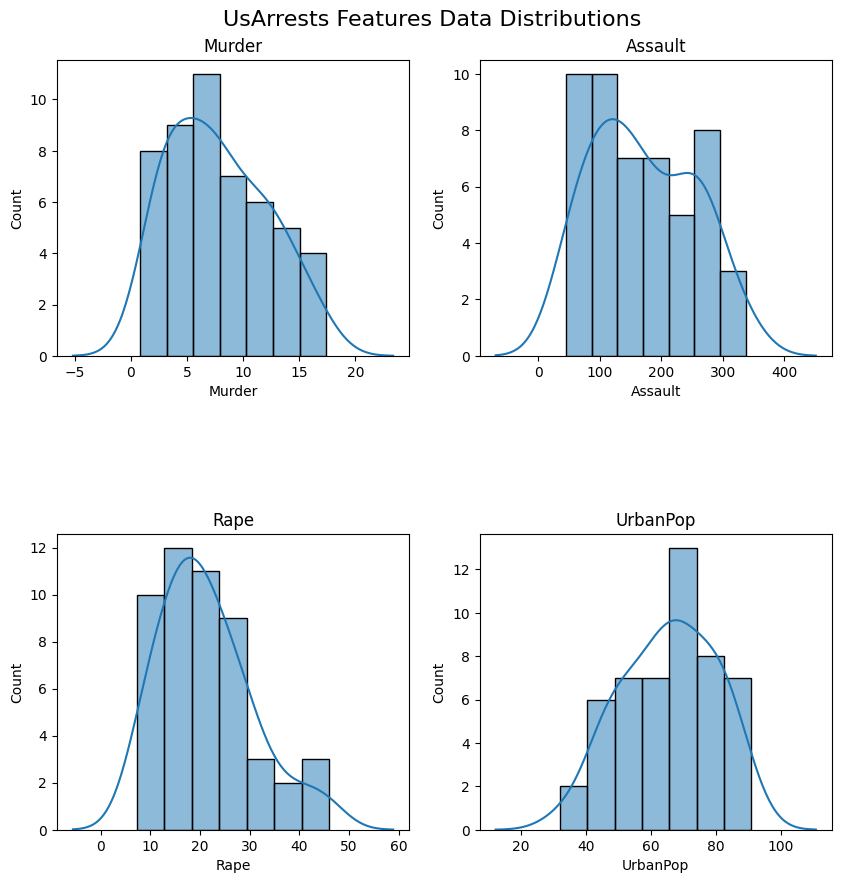

In [16]:
# Create a figure and specify the size
plt.figure(figsize = (10,10))
plt.subplots_adjust(hspace = 0.6)

# Create sup title
plt.suptitle("UsArrests Features Data Distributions", size = 16, y = 0.93)

# Create the first subplot
plt.subplot(2, 2, 1)
sns.histplot(x = "Murder", data = usArrests_df,
             kde = True, kde_kws=dict(cut=3))
plt.title("Murder")

# Create the 2nd subplot
plt.subplot(2, 2, 2)
sns.histplot(x = "Assault", data = usArrests_df,
             kde = True, kde_kws=dict(cut=3))
plt.title("Assault")

# Create the 4th subplot
plt.subplot(2, 2, 3)
sns.histplot(x = "Rape", data = usArrests_df,
             kde = True, kde_kws=dict(cut=3))
plt.title("Rape")

# Create the 3rdsubplot
plt.subplot(2, 2, 4)
sns.histplot(x = "UrbanPop", data = usArrests_df,
             kde = True, kde_kws=dict(cut=3))
plt.title("UrbanPop")



plt.show()

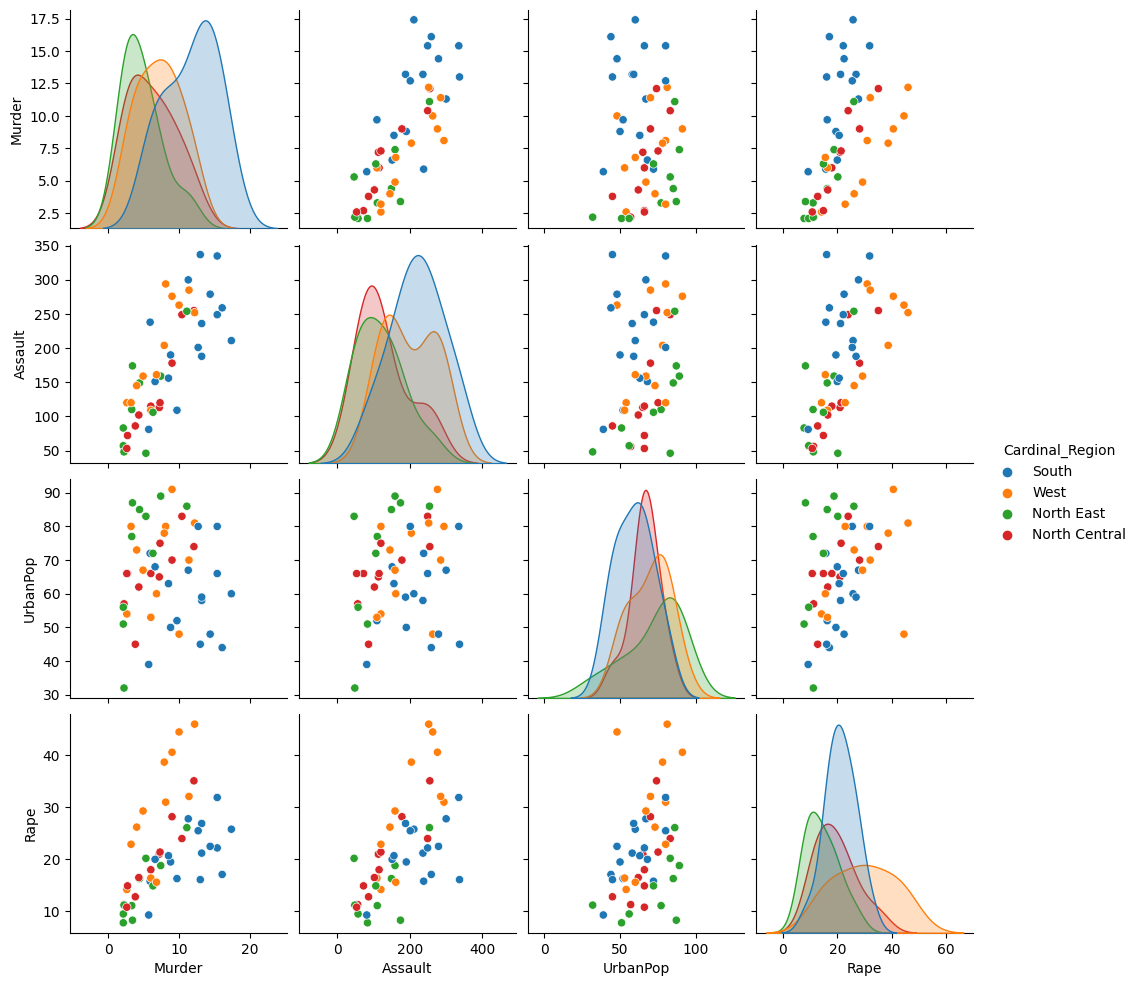

In [17]:
# Scatterplot pairplot with the "Region" variable as the hue.
sns.pairplot(usArrests_df, hue = "Cardinal_Region")

# Show plot
plt.show()
plt.close()

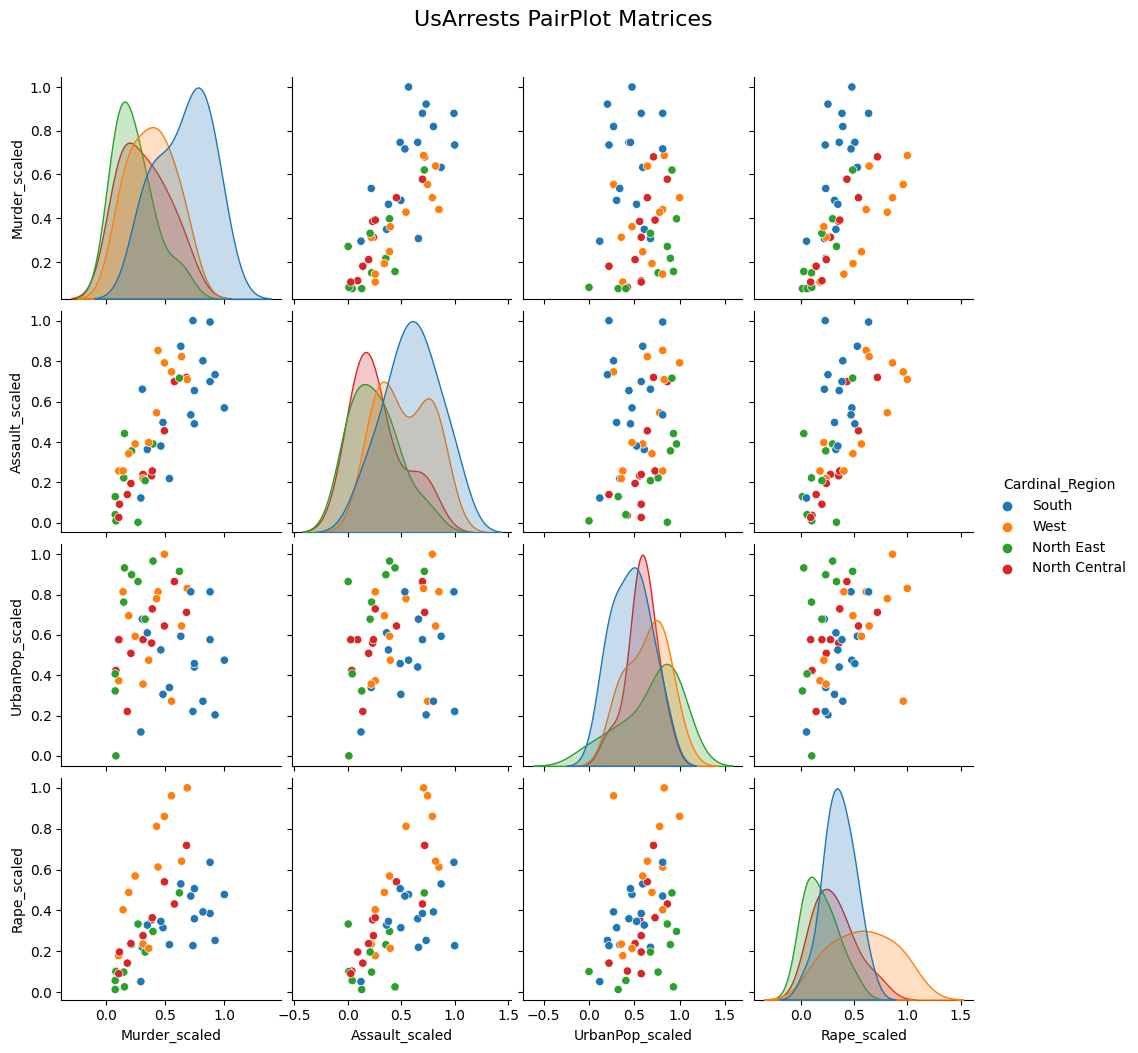

In [18]:
# Scaled Scatterplot pairplot with the "Region" variable as the hue.
sns.pairplot(usArrests_copy_df, hue = "Cardinal_Region")

# Show plot
plt.suptitle("UsArrests PairPlot Matrices", size = 16, y = 1.05)
plt.show()
plt.close()

C:\Users\karlb\AppData\Local\Temp\ipykernel_20536\1991059847.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrs = df.corr()


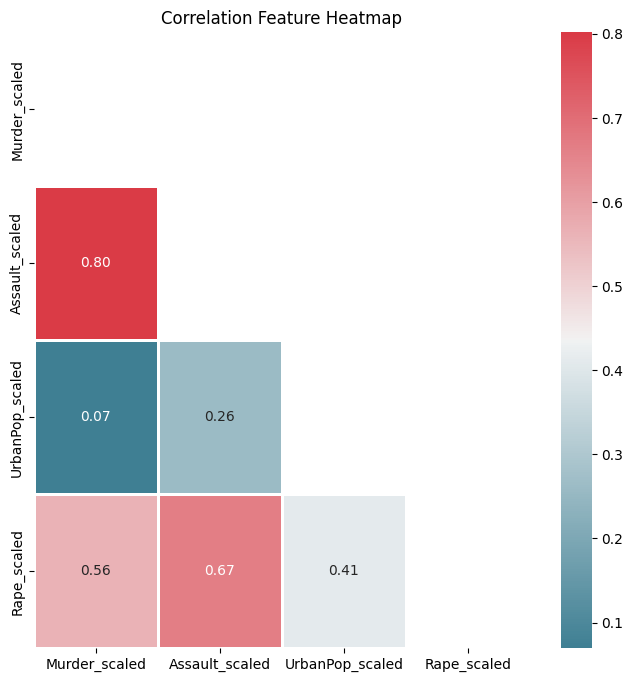

In [19]:
# Selecting colour, Cmpa = True return colourmap object
colormap = sns.diverging_palette(220, 10, as_cmap=True)

def corr_heatmap(df):
  # get correlations
  corrs = df.corr()

  # pick appropriate palette for heatmap

  # Plot figsize
  fig, ax = plt.subplots(figsize=(8, 8))

  # to mask mirrored side of heatmap
  dropSelf = np.zeros_like(corrs)
  dropSelf[np.triu_indices_from(dropSelf)] = True

  # Generate Heat Map, with annotations of the correlation strength and 2-decimal floats
  ax = sns.heatmap(corrs, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf, linewidth=2)

  plt.title("Correlation Feature Heatmap")
  plt.show()

corr_heatmap(usArrests_copy_df)

In [20]:
# Select Data for 3D visualisation
g1 = usArrests_df["UrbanPop"]
g2 = usArrests_df["Assault"]
g3 = usArrests_df["Rape"]

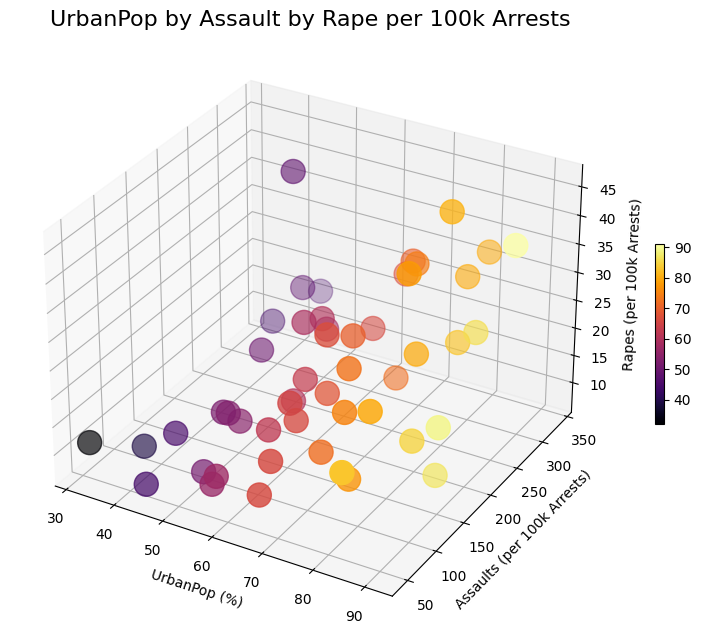

In [21]:
# Create 3d Plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Plot scatter with colour grade
colors = np.where(np.isin(g1, g1), g1, np.nan)
sc = ax.scatter(g1, g2, g3, c = colors, cmap='inferno', s = 300)

# Customise Plot
plt.title("UrbanPop by Assault by Rape per 100k Arrests", size = 16)
plt.subplots_adjust(left=0.1, right=1, bottom=0.2, top=0.8)
plt.colorbar(sc, shrink = 0.3)
ax.set_xlabel('UrbanPop (%)')
ax.set_ylabel('Assaults (per 100k Arrests)')
ax.set_zlabel('Rapes (per 100k Arrests)')

# Show Plot
plt.show()
plt.close()

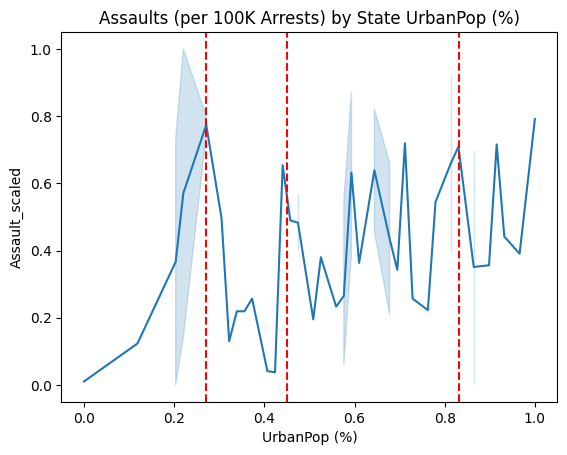

In [22]:
# Plot n_estimator by max accuracy
sns.lineplot(usArrests_copy_df, x= "UrbanPop_scaled", y = "Assault_scaled")

# Add Region
plt.axvline( x= 0.27, color = "red", linestyle = "--")
plt.axvline( x= 0.832, color = "red", linestyle = "--")
plt.axvline( x= 0.45, color = "red", linestyle = "--")

# Customise Plot
plt.title("Assaults (per 100K Arrests) by State UrbanPop (%)")
plt.xlabel('UrbanPop (%)')

# Show PLot
plt.show()
plt.close()

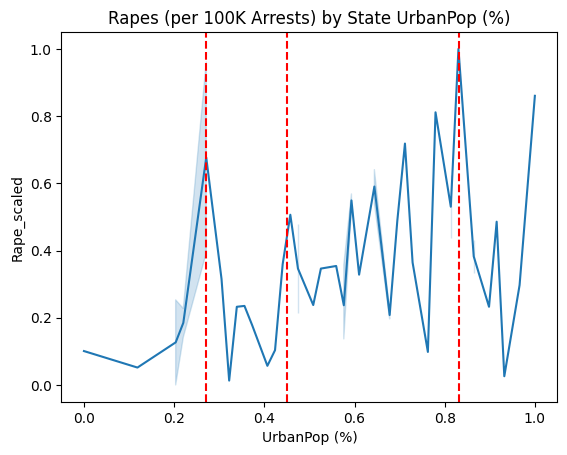

In [23]:
# Plot n_estimator by max accuracy
sns.lineplot(usArrests_copy_df, x= "UrbanPop_scaled", y = "Rape_scaled")

# Add Region
plt.axvline( x= 0.27, color = "red", linestyle = "--")
plt.axvline( x= 0.832, color = "red", linestyle = "--")
plt.axvline( x= 0.45, color = "red", linestyle = "--")

# Customise Plot
plt.title("Rapes (per 100K Arrests) by State UrbanPop (%)")
plt.xlabel('UrbanPop (%)')

# Show PLot
plt.show()
plt.close()

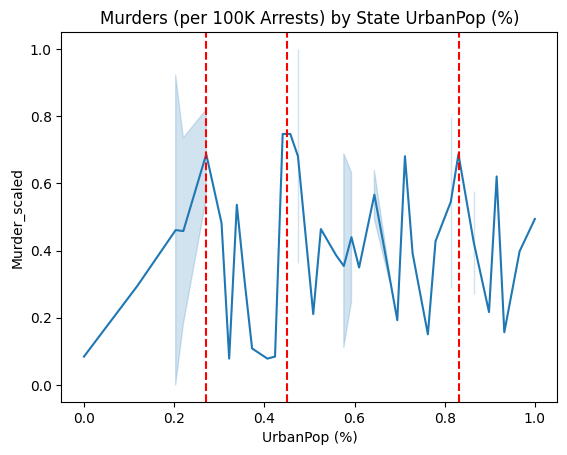

In [24]:
# Plot n_estimator by max accuracy
sns.lineplot(usArrests_copy_df, x= "UrbanPop_scaled", y = "Murder_scaled")

# Add Region
plt.axvline( x= 0.27, color = "red", linestyle = "--")
plt.axvline( x= 0.45, color = "red", linestyle = "--")
plt.axvline( x= 0.832, color = "red", linestyle = "--")

# Customise Plot
plt.title("Murders (per 100K Arrests) by State UrbanPop (%)")
plt.xlabel('UrbanPop (%)')

# Show PLot
plt.show()
plt.close()

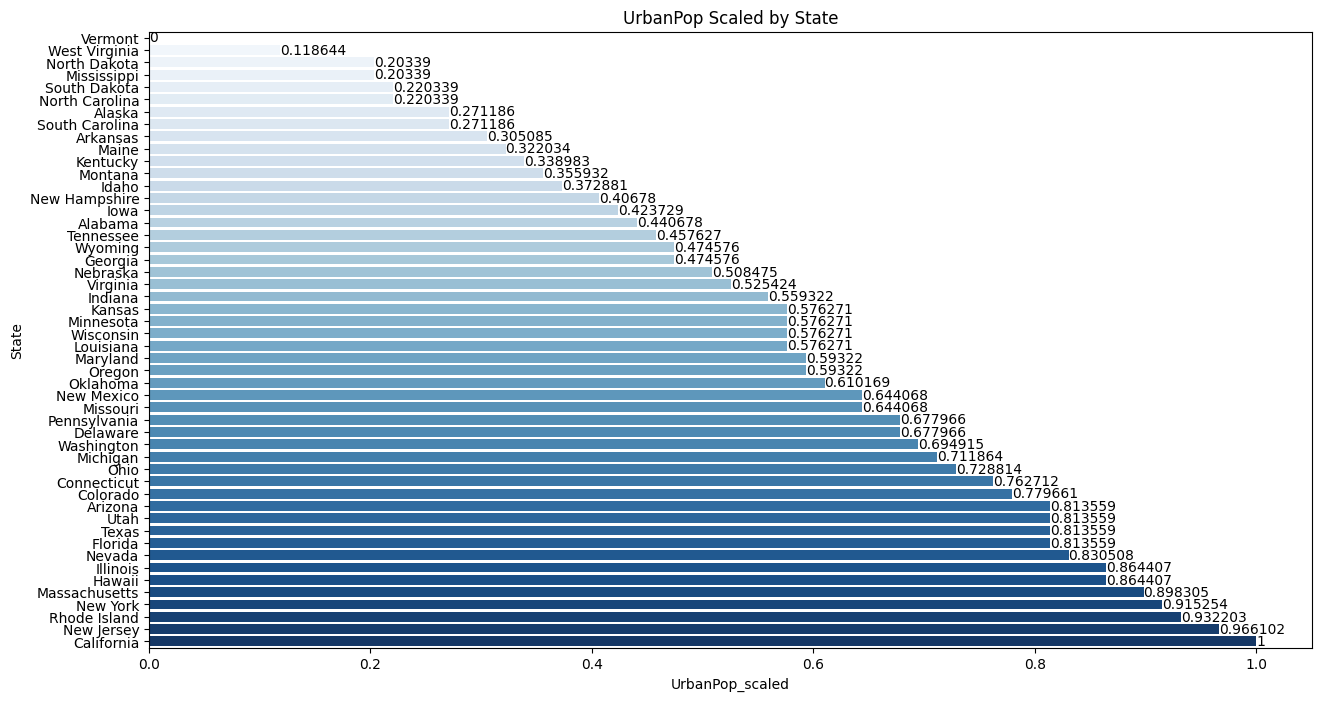

In [25]:
# Bar plot of States for Urban_pop
usArrests_urbanpop_df = usArrests_copy_df.sort_values("UrbanPop_scaled")

# Plot barplot
plt.figure(figsize = (15,8))
ax = sns.barplot(y="State", x="UrbanPop_scaled", data=usArrests_urbanpop_df,orient='h',palette="Blues")
plt.title("UrbanPop Scaled by State")

# Show bar labels
for i in ax.containers:
    ax.bar_label(i,)

# Show plot
plt.show()
plt.close()


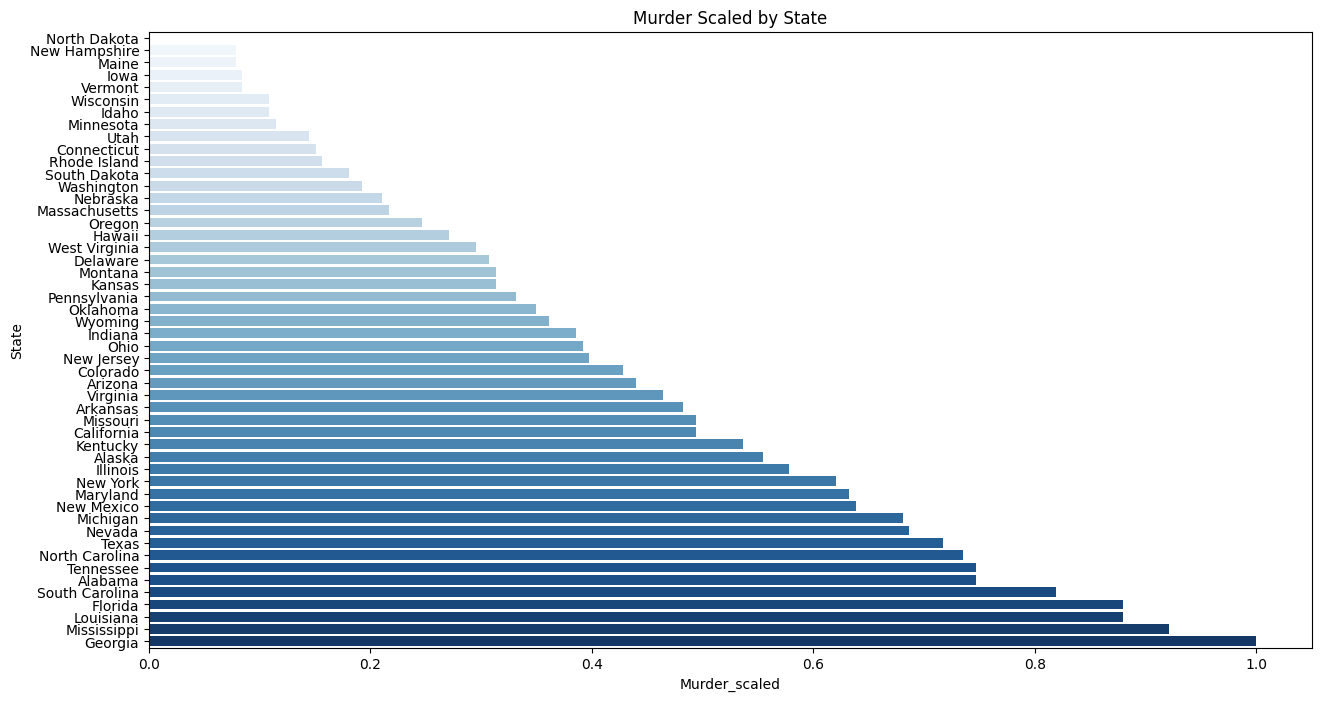

In [26]:
# Bar plot of States for Murder
usArrests_murder_df = usArrests_copy_df.sort_values("Murder_scaled")

# Plot barplot
plt.figure(figsize = (15,8))
ax = sns.barplot(y="State", x="Murder_scaled", data=usArrests_murder_df,orient='h',palette="Blues")
plt.title("Murder Scaled by State")

# Show plot
plt.show()
plt.close()


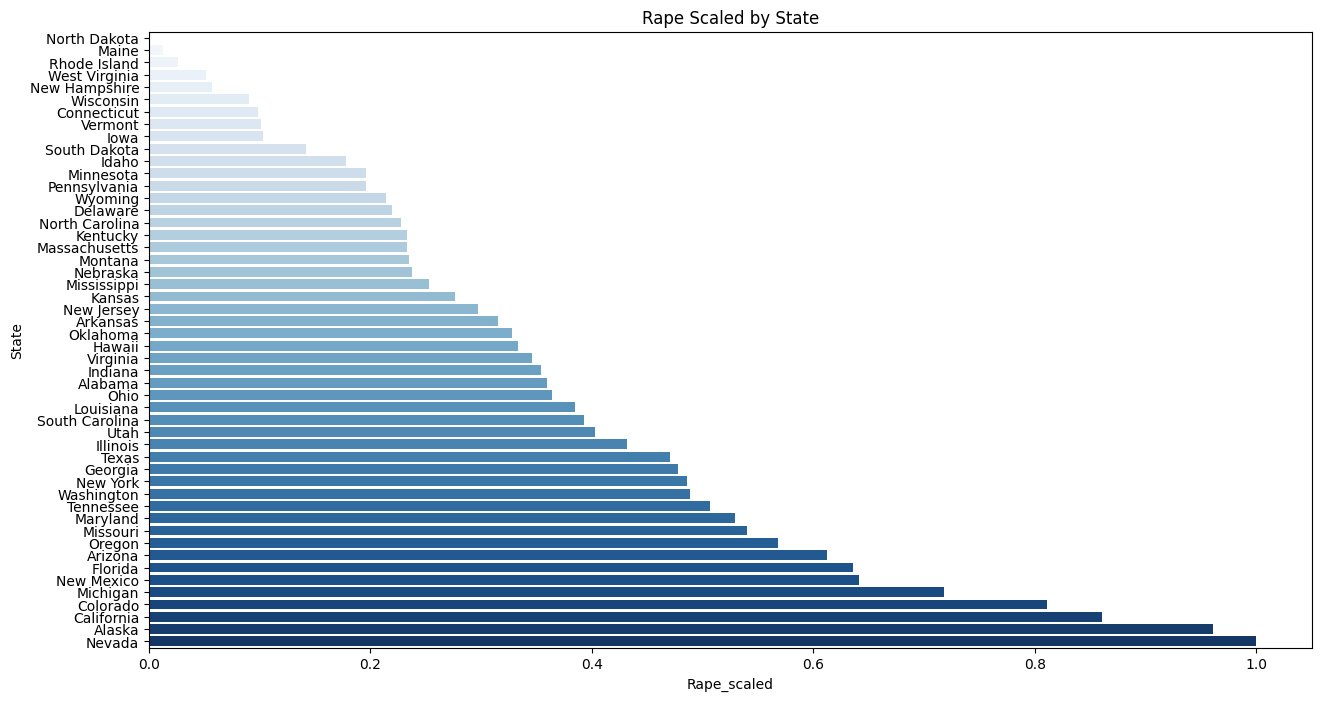

In [27]:
# Bar plot of States for Rape
usArrests_rape_df = usArrests_copy_df.sort_values("Rape_scaled")

# Plot barplot
plt.figure(figsize = (15,8))
ax = sns.barplot(y="State", x="Rape_scaled", data=usArrests_rape_df,orient='h',palette="Blues")
plt.title("Rape Scaled by State")

# Show plot
plt.show()
plt.close()


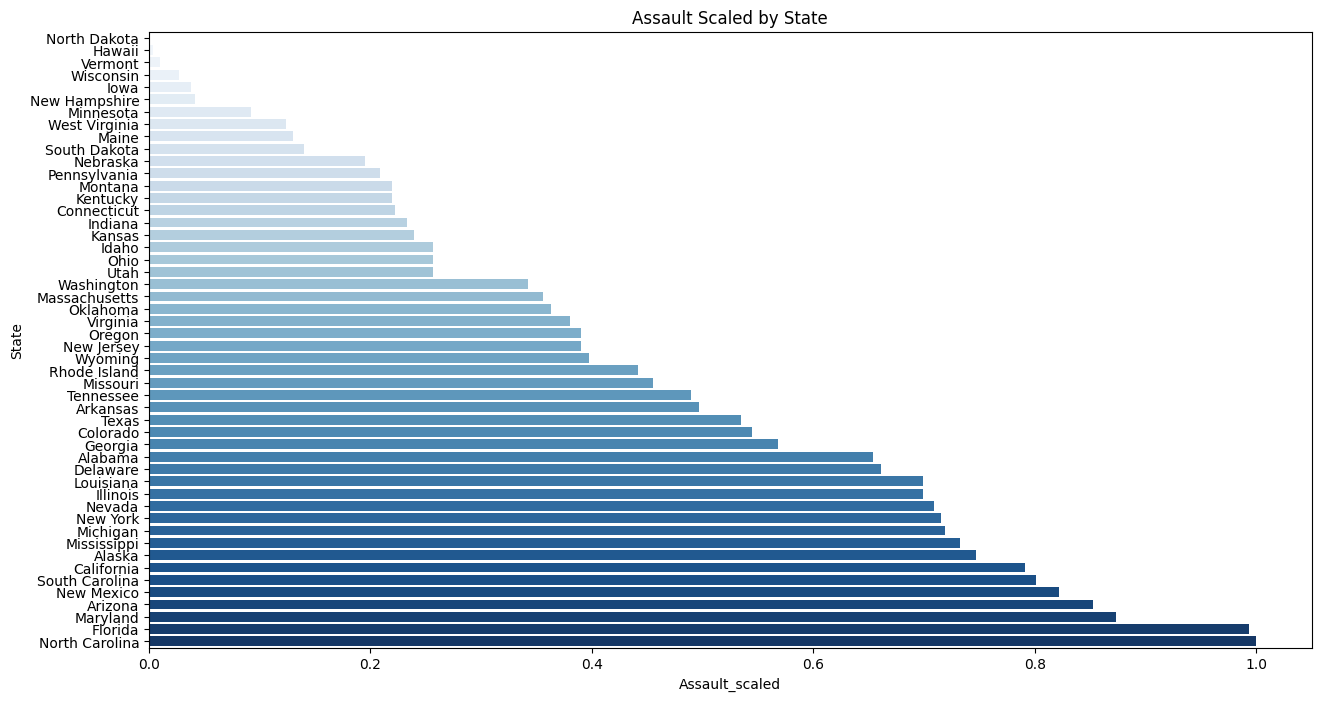

In [28]:
# Bar plot of States for Assault
usArrests_assault_df = usArrests_copy_df.sort_values("Assault_scaled")

# Plot barplot
plt.figure(figsize = (15,8))
ax = sns.barplot(y="State", x="Assault_scaled", data=usArrests_assault_df,orient='h',palette="Blues")
plt.title("Assault Scaled by State")

# Show plot
plt.show()
plt.close()


C:\Users\karlb\AppData\Local\Temp\ipykernel_20536\3560795064.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  usArrests_urbanpop_df = usArrests_copy_df.groupby("Cardinal_Region").mean()


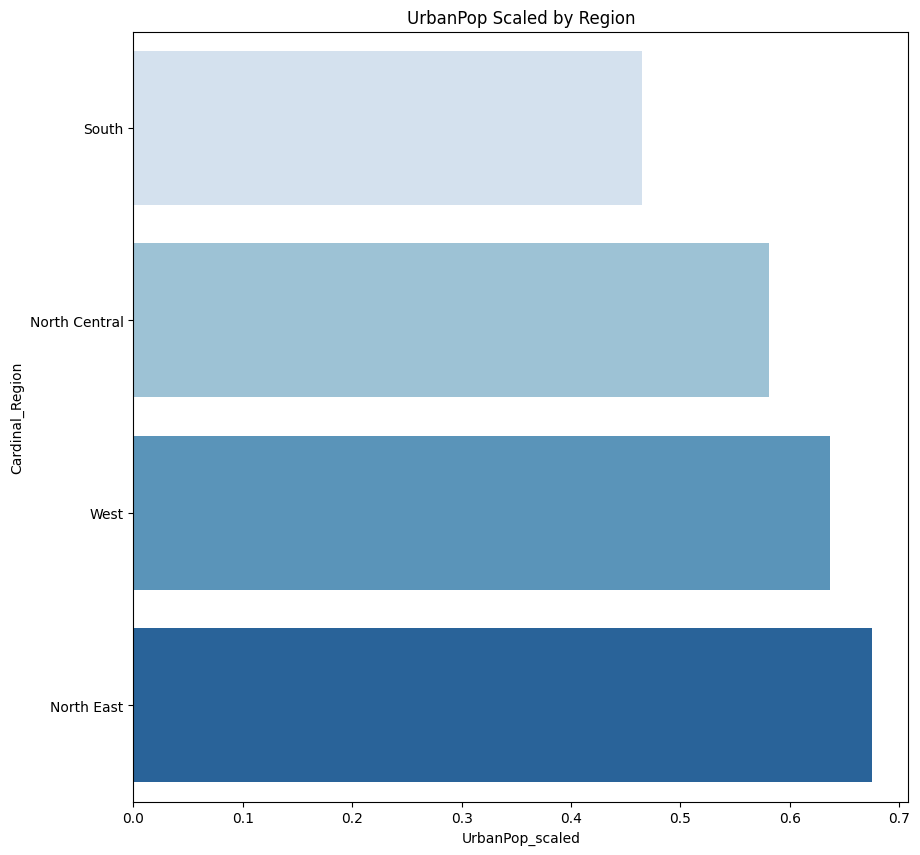

In [29]:
# Bar plot of Regions for Urban_pop
usArrests_urbanpop_df = usArrests_copy_df.groupby("Cardinal_Region").mean()
usArrests_urbanpop_df = usArrests_urbanpop_df.sort_values("UrbanPop_scaled")

# Plot barplot
plt.figure(figsize = (10,10))
ax = sns.barplot(y=usArrests_urbanpop_df.index, x="UrbanPop_scaled", data=usArrests_urbanpop_df,orient='h',palette="Blues")
plt.title("UrbanPop Scaled by Region")

# Show plot
plt.show()
plt.close()


C:\Users\karlb\AppData\Local\Temp\ipykernel_20536\2479480798.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  usArrests_urbanpop_df = usArrests_copy_df.groupby("Cardinal_Region").mean()


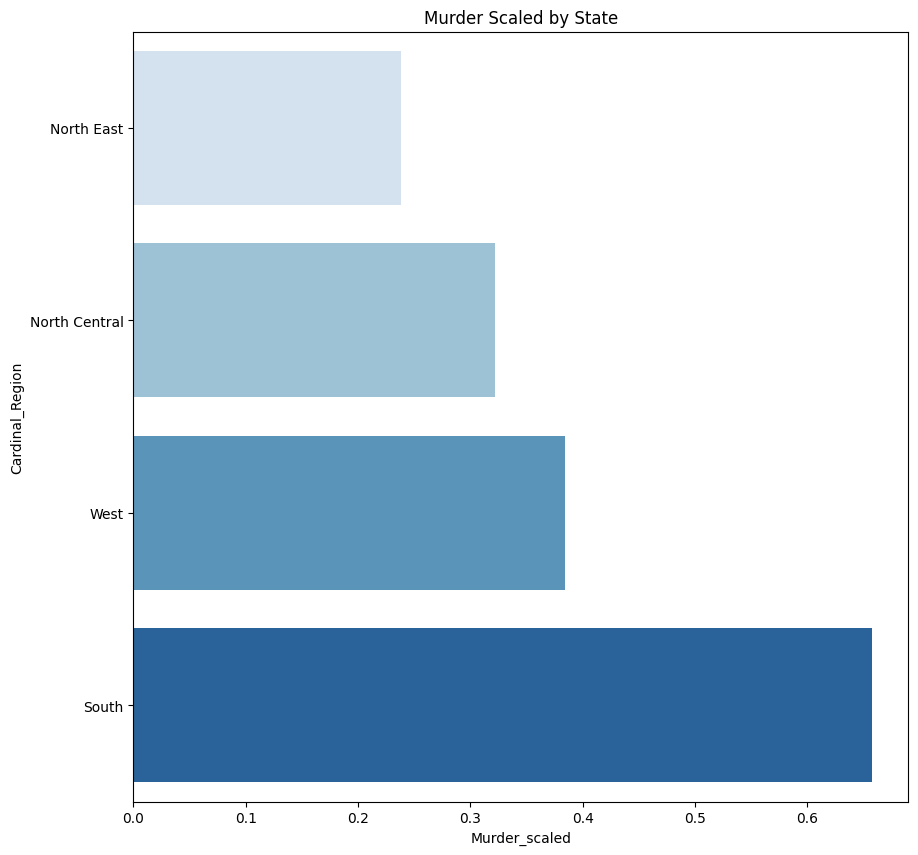

In [30]:
# Bar plot of Regions for Murder
usArrests_urbanpop_df = usArrests_copy_df.groupby("Cardinal_Region").mean()
usArrests_urbanpop_df = usArrests_urbanpop_df.sort_values("Murder_scaled")

# Plot barplot
plt.figure(figsize = (10,10))
ax = sns.barplot(y=usArrests_urbanpop_df.index, x="Murder_scaled", data=usArrests_urbanpop_df,orient='h',palette="Blues")
plt.title("Murder Scaled by State")

# Show plot
plt.show()
plt.close()


C:\Users\karlb\AppData\Local\Temp\ipykernel_20536\2878734712.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  usArrests_urbanpop_df = usArrests_copy_df.groupby("Cardinal_Region").mean()


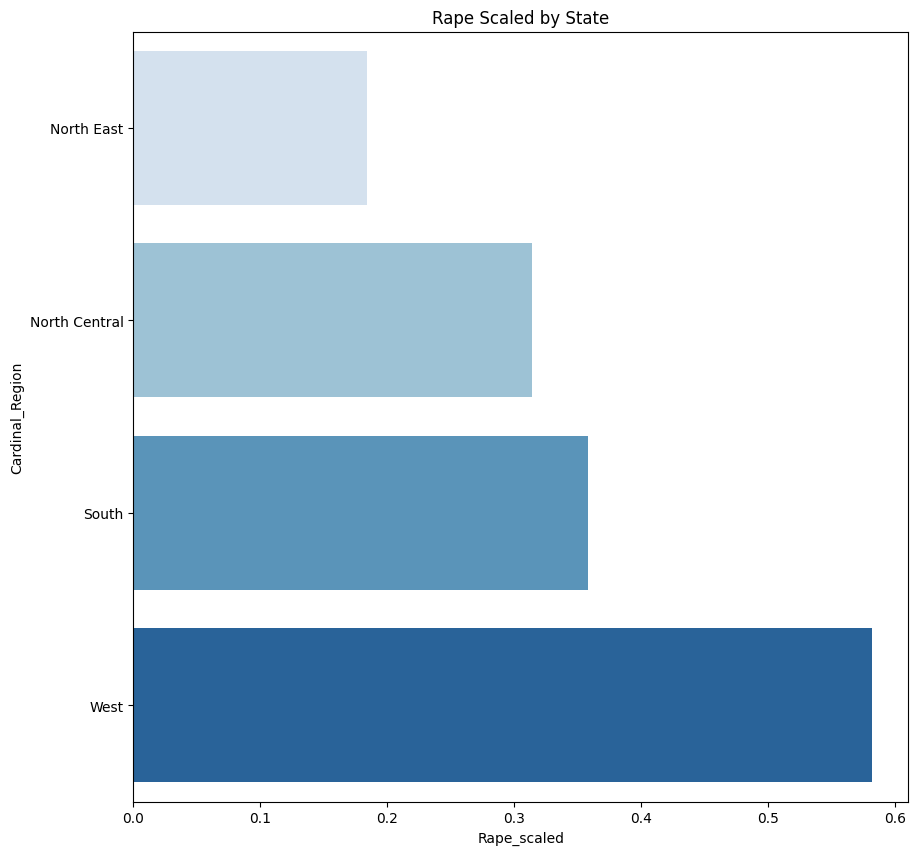

In [31]:
# Bar plot of Regions for Rape
usArrests_urbanpop_df = usArrests_copy_df.groupby("Cardinal_Region").mean()
usArrests_urbanpop_df = usArrests_urbanpop_df.sort_values("Rape_scaled")

# Plot barplot
plt.figure(figsize = (10,10))
ax = sns.barplot(y=usArrests_urbanpop_df.index, x="Rape_scaled", data=usArrests_urbanpop_df,orient='h',palette="Blues")
plt.title("Rape Scaled by State")

# Show plot
plt.show()
plt.close()


C:\Users\karlb\AppData\Local\Temp\ipykernel_20536\530348993.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  usArrests_urbanpop_df = usArrests_copy_df.groupby("Cardinal_Region").mean()


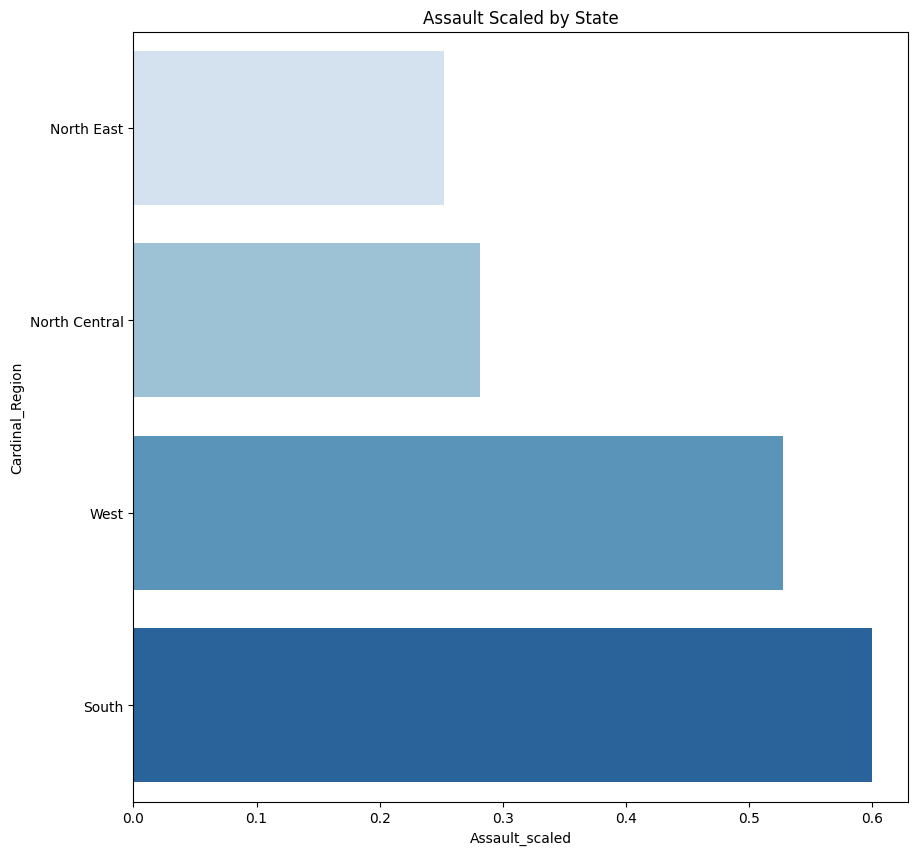

In [32]:
# Bar plot of Regions for Assault
usArrests_urbanpop_df = usArrests_copy_df.groupby("Cardinal_Region").mean()
usArrests_urbanpop_df = usArrests_urbanpop_df.sort_values("Assault_scaled")

# Plot barplot
plt.figure(figsize = (10,10))
ax = sns.barplot(y=usArrests_urbanpop_df.index, x="Assault_scaled", data=usArrests_urbanpop_df,orient='h',palette="Blues")
plt.title("Assault Scaled by State")

# Show plot
plt.show()
plt.close()


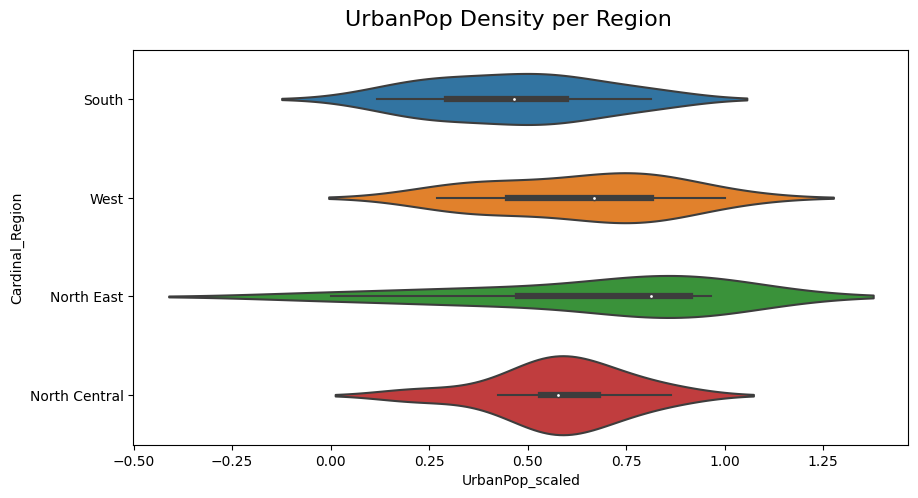

In [33]:
# Violin Plot Up Region 
plt.figure(figsize = (10,5))
sns.violinplot(usArrests_copy_df,
               x = "UrbanPop_scaled", 
               y = "Cardinal_Region")

# Customise plot
plt.suptitle("UrbanPop Density per Region", fontsize = 16)
plt.subplots_adjust(top=0.9)

# Show Plot.
plt.show()
plt.close()

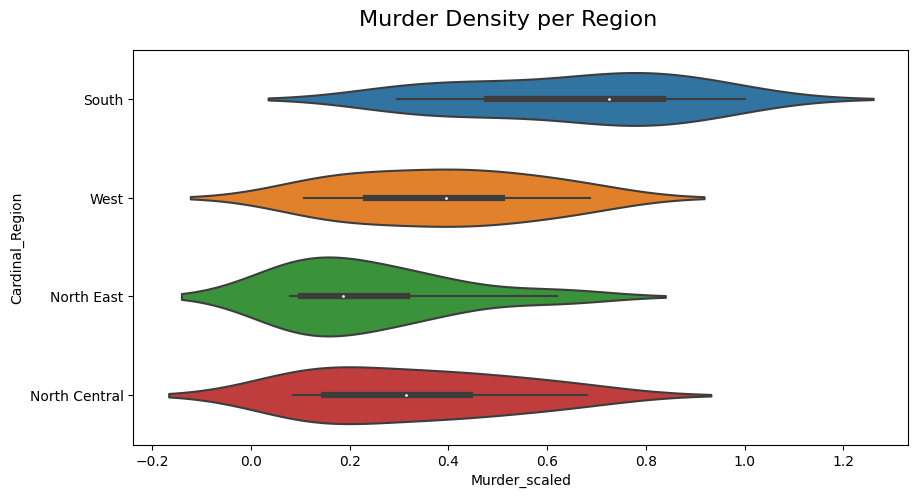

In [34]:
# Violin Plot Murder per Region
plt.figure(figsize = (10,5))
sns.violinplot(usArrests_copy_df,
               x = "Murder_scaled", 
               y = "Cardinal_Region")

# Customise plot
plt.suptitle("Murder Density per Region", fontsize = 16)
plt.subplots_adjust(top=0.9)

# Show Plot.
plt.show()
plt.close()

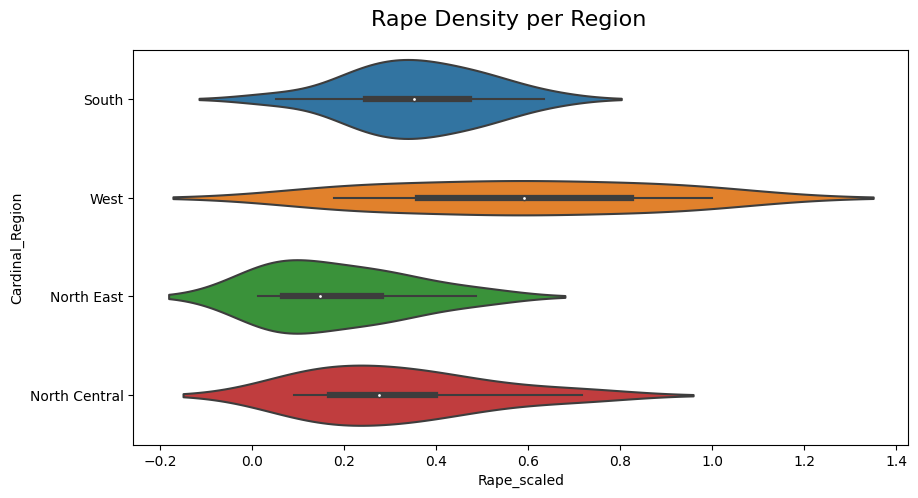

In [35]:
# Violin Plot Rape per Region
plt.figure(figsize = (10,5))
sns.violinplot(usArrests_copy_df,
               x = "Rape_scaled", 
               y = "Cardinal_Region")

# Customise plot
plt.suptitle("Rape Density per Region", fontsize = 16)
plt.subplots_adjust(top=0.9)

# Show Plot.
plt.show()
plt.close()

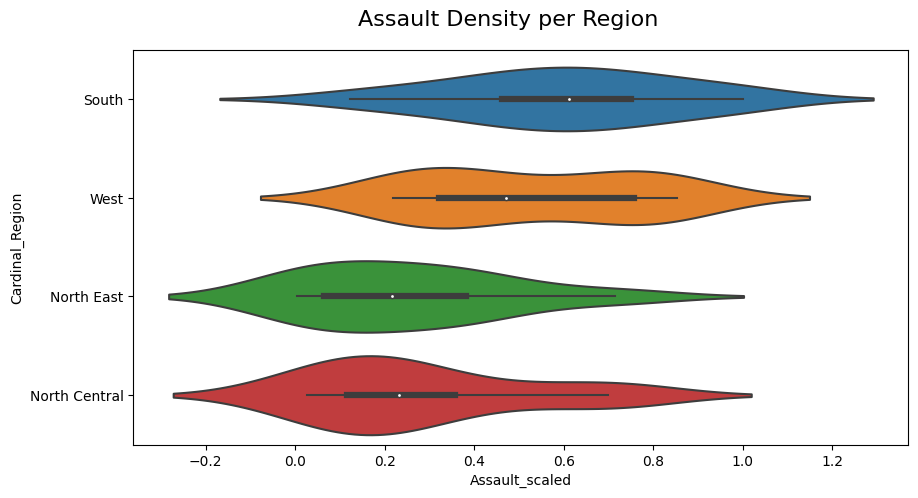

In [36]:
# Violin Plot Assault per Region
plt.figure(figsize = (10,5))
sns.violinplot(usArrests_copy_df,
               x = "Assault_scaled", 
               y = "Cardinal_Region")

# Customise plot
plt.suptitle("Assault Density per Region", fontsize = 16)
plt.subplots_adjust(top=0.9)

# Show Plot.
plt.show()
plt.close()

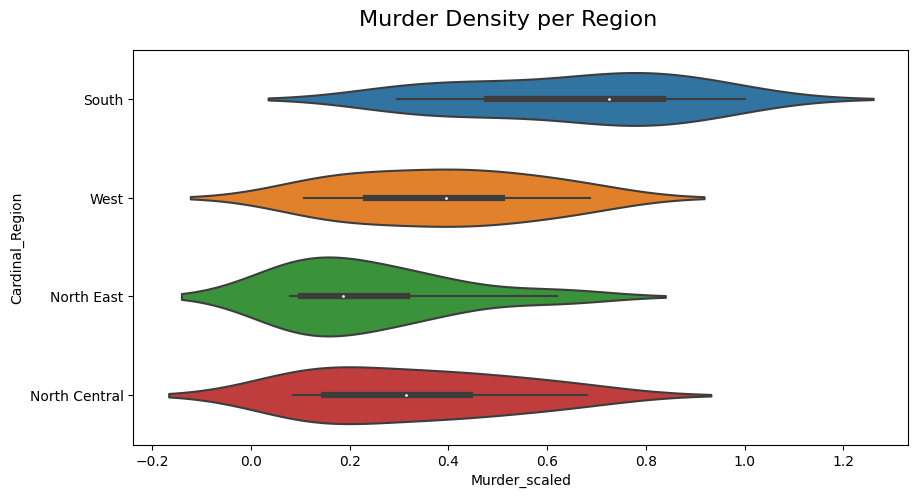

In [37]:
# Violin Plot All X variables
plt.figure(figsize = (10,5))
sns.violinplot(usArrests_copy_df,
               x = "Murder_scaled", 
               y = "Cardinal_Region")

# Customise plot
plt.suptitle("Murder Density per Region", fontsize = 16)
plt.subplots_adjust(top=0.9)

# Show Plot.
plt.show()
plt.close()

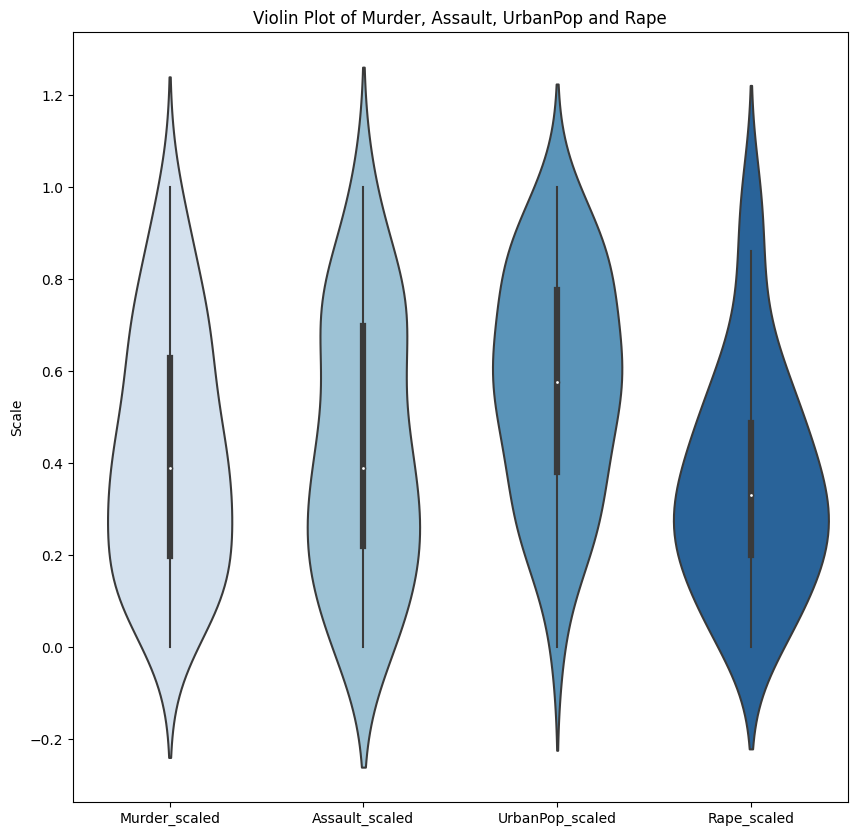

In [38]:
# Create the violin plot
plt.figure(figsize=(10,10))
sns.violinplot(data=usArrests_copy_df, palette="Blues")

# Add a title to the plot
plt.title("Violin Plot of Murder, Assault, UrbanPop and Rape")
plt.ylabel("Scale")

# Show the plot
plt.show()
plt.close()


C:\Users\karlb\AppData\Local\Temp\ipykernel_20536\372723532.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  usArrests_regions = usArrests_df.groupby("Cardinal_Region").sum()


<Figure size 1000x1000 with 0 Axes>

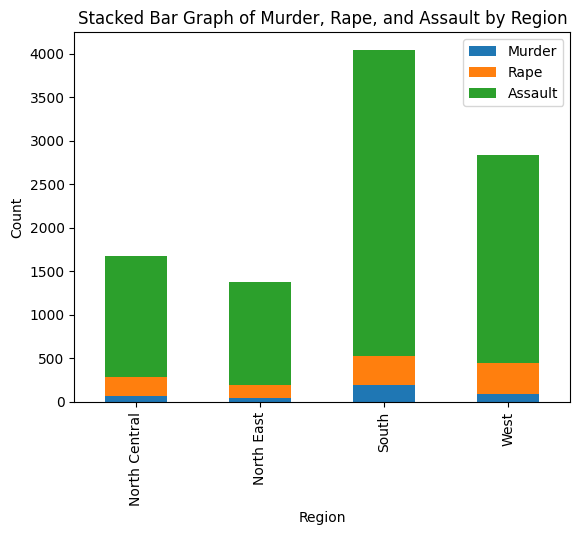

In [39]:
# Create a new dataframe with the sum of murder, rape, and assault for each region
usArrests_regions = usArrests_df.groupby("Cardinal_Region").sum()

# Plot the stacked bar graph
plt.figure(figsize=(10,10))
ax = usArrests_regions[["Murder", "Rape", "Assault"]].plot(kind='bar', stacked=True)
plt.title("Stacked Bar Graph of Murder, Rape, and Assault by Region")
plt.xlabel("Region")
plt.ylabel("Count")

# Show the plot
plt.show()
plt.close()


C:\Users\karlb\AppData\Local\Temp\ipykernel_20536\4276658022.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  usArrests_regions = usArrests_copy_df.groupby("Cardinal_Region").mean()


<Figure size 500x1000 with 0 Axes>

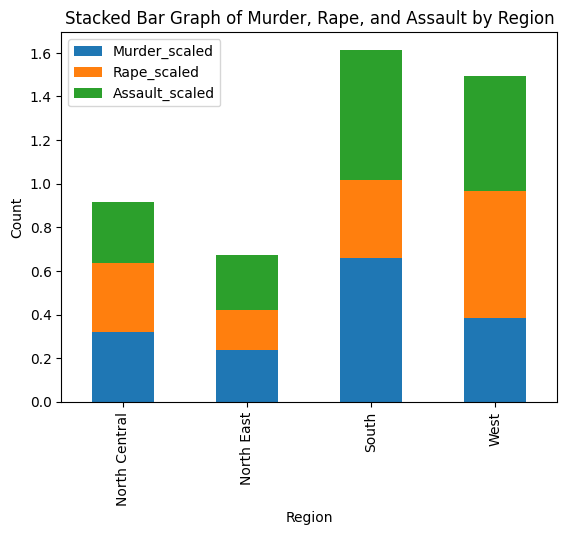

In [40]:
# Create a new dataframe with the sum of murder, rape, and assault for each region
usArrests_regions = usArrests_copy_df.groupby("Cardinal_Region").mean()

# Plot the stacked bar graph
plt.figure(figsize=(5,10))
ax = usArrests_regions[["Murder_scaled", "Rape_scaled", "Assault_scaled"]].plot(kind='bar', stacked=True)
plt.title("Stacked Bar Graph of Murder, Rape, and Assault by Region")
plt.xlabel("Region")
plt.ylabel("Count")

# Show the plot
plt.show()
plt.close()


C:\Users\karlb\AppData\Local\Temp\ipykernel_20536\3118833238.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = usArrests_copy_df.groupby("Cardinal_Region").mean()


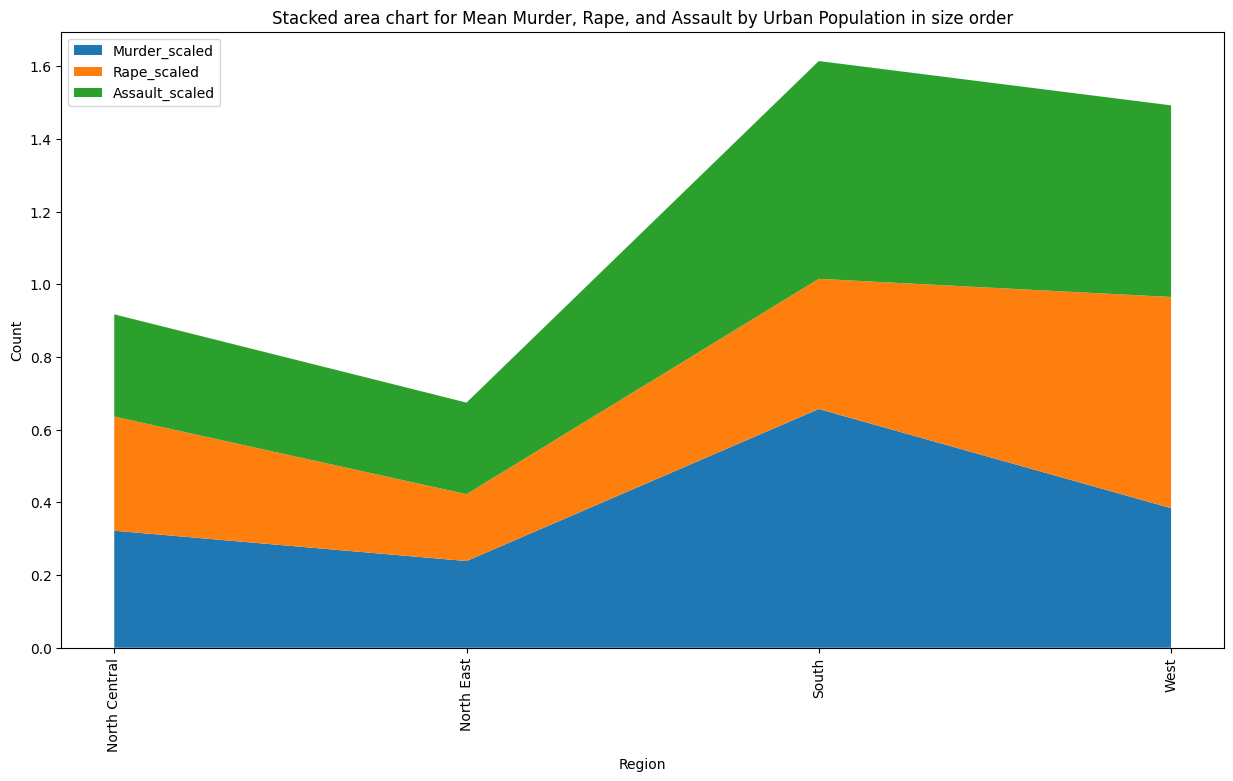

In [41]:
# Group by region
grouped_df = usArrests_copy_df.groupby("Cardinal_Region").mean()

# Get values for murder, rape and assault
groupOne = grouped_df["Murder_scaled"]
groupTwo = grouped_df["Rape_scaled"]
groupThree = grouped_df["Assault_scaled"]

# Stack the data
y = np.row_stack((groupOne,groupTwo,groupThree))
x = np.arange(len(grouped_df.index))

# Plot the stacked area chart
fig, ax = plt.subplots(figsize = (15,8))
ax.stackplot(x, y, labels=["Murder_scaled", "Rape_scaled", "Assault_scaled"])

# Add labels and title
plt.legend(loc="upper left")
plt.title("Stacked area chart for Mean Murder, Rape, and Assault by Urban Population in size order")
plt.xlabel("Region")
plt.ylabel("Count")

# Add State Names as Labels
plt.xticks(x, grouped_df.index, rotation=90)

# Show the plot
plt.show()
plt.close()


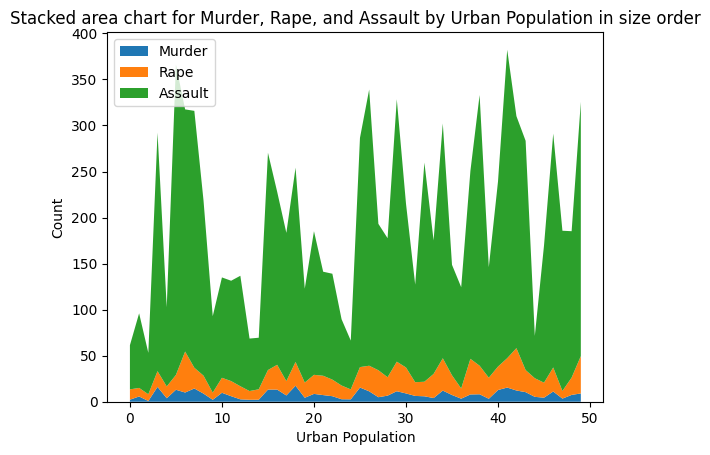

In [42]:
# Get data in size order
usArrests_df = usArrests_df.sort_values("UrbanPop")

# Get values for murder, rape and assault
groupOne = usArrests_df["Murder"]
groupTwo = usArrests_df["Rape"]
groupThree = usArrests_df["Assault"]

# Stack the data
y = np.row_stack((groupOne,groupTwo,groupThree))
x = np.arange(len(usArrests_df))

# Plot the stacked area chart
fig, ax = plt.subplots()
ax.stackplot(x, y, labels=["Murder", "Rape", "Assault"])

# Add labels and title
plt.legend(loc="upper left")
plt.title("Stacked area chart for Murder, Rape, and Assault by Urban Population in size order")
plt.xlabel("Urban Population")
plt.ylabel("Count")

# Show the plot
plt.show()
plt.close()


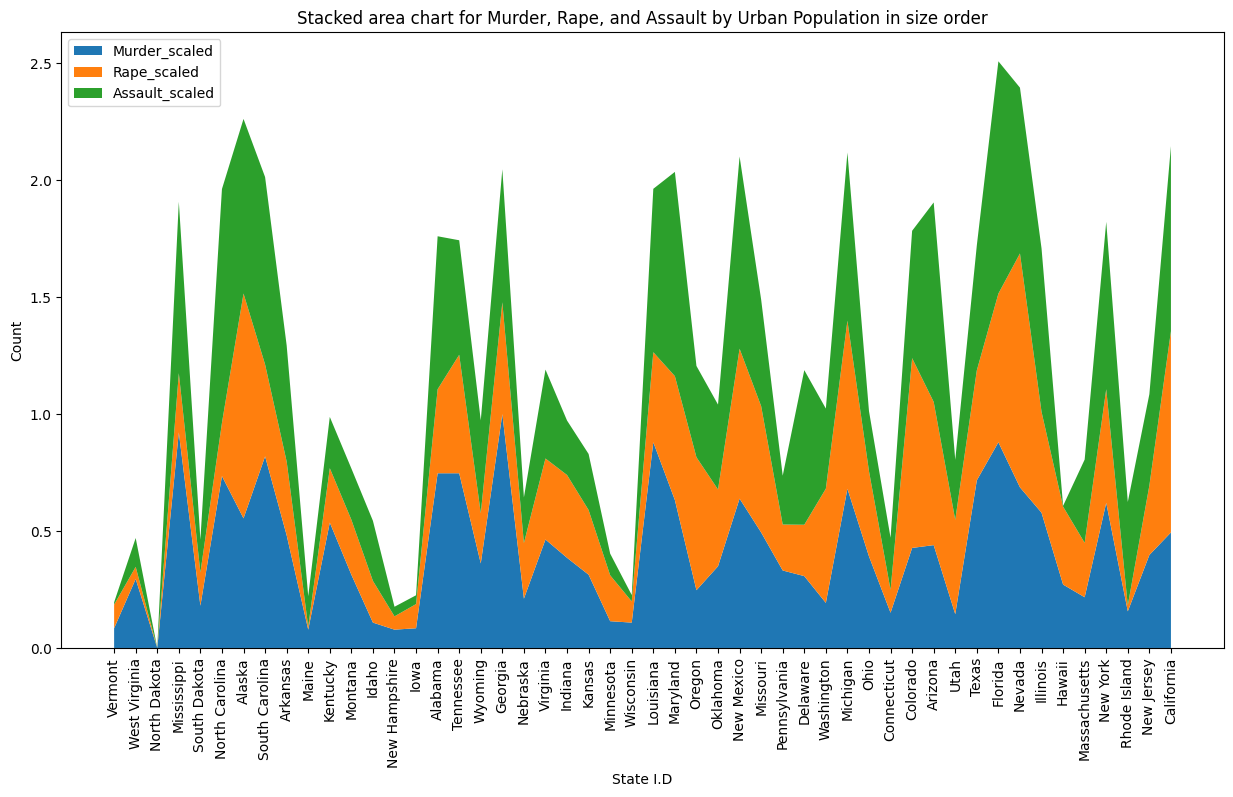

In [43]:
# Get data in size order
usArrests_copy_df = usArrests_copy_df.sort_values("UrbanPop_scaled")

# Get values for murder, rape and assault
groupOne = usArrests_copy_df["Murder_scaled"]
groupTwo = usArrests_copy_df["Rape_scaled"]
groupThree = usArrests_copy_df["Assault_scaled"]

# Stack the data
y = np.row_stack((groupOne,groupTwo,groupThree))
x = np.arange(len(usArrests_copy_df))

# Plot the stacked area chart
fig, ax = plt.subplots(figsize = (15,8))
ax.stackplot(x, y, labels=["Murder_scaled", "Rape_scaled", "Assault_scaled"])

# Add labels and title
plt.legend(loc="upper left")
plt.title("Stacked area chart for Murder, Rape, and Assault by Urban Population in size order")
plt.xlabel("State I.D")
plt.ylabel("Count")

# Add State Names as Labels
plt.xticks(x, usArrests_copy_df["State"], rotation=90)

# Show the plot
plt.show()
plt.close()
